In [1]:
from google.colab import files

files.upload()  # Upload the kaggle.json file here


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"shamiulislam693","key":"7457fbbeb1f26124e027793803020888"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d jessicali9530/lfw-dataset


Dataset URL: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset
License(s): other
lfw-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q lfw-dataset.zip -d ./lfw


In [4]:
import os
extract_to_path = '/content/lfw'
os.makedirs(extract_to_path, exist_ok=True)
extracted_files = os.listdir(extract_to_path)
extracted_files

['lfw_allnames.csv',
 'matchpairsDevTrain.csv',
 'lfw-deepfunneled',
 'lfw_readme.csv',
 'people.csv',
 'peopleDevTest.csv',
 'models',
 'pairs.csv',
 'mismatchpairsDevTest.csv',
 'matchpairsDevTest.csv',
 'mismatchpairsDevTrain.csv',
 'peopleDevTrain.csv']

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import random

# Correcting the directory path
images_dir = os.path.join(extract_to_path, 'lfw-deepfunneled', 'lfw-deepfunneled')

# Re-list all subdirectories (each person's name)
persons = os.listdir(images_dir)

# Randomly select one person and list their images again
selected_person = random.choice(persons)
person_images = os.listdir(os.path.join(images_dir, selected_person))

# Load a few sample images again
sample_images = person_images[:5]  # Load first 5 images

# Display properties and images
image_properties = []
for img_name in sample_images:
    img_path = os.path.join(images_dir, selected_person, img_name)
    img = Image.open(img_path)
    image_properties.append((img_name, img.size, img.format))

# Display properties
image_properties

[('Anthony_Hazen_0001.jpg', (250, 250), 'JPEG')]

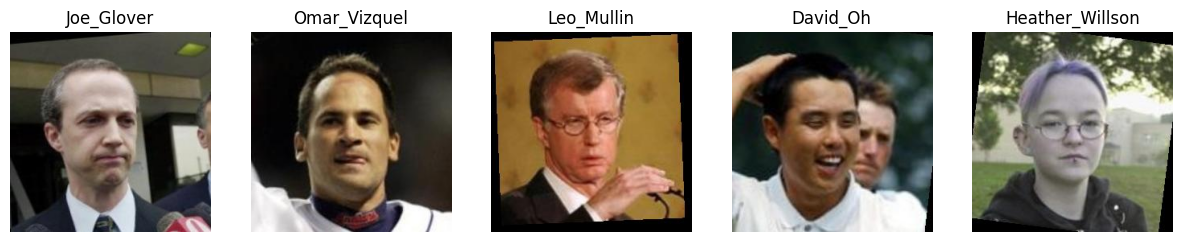

In [7]:
# Let's load and display images from five different persons to understand the variety and distribution of faces
# Selecting 5 random persons
random_persons = random.sample(persons, 5)

# For each selected person, we will pick one random image
selected_images = []
for person in random_persons:
    person_image_dir = os.path.join(images_dir, person)
    person_image_files = os.listdir(person_image_dir)
    selected_image_file = random.choice(person_image_files)
    selected_images.append(os.path.join(person_image_dir, selected_image_file))

# Plotting the images
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, img_path in enumerate(selected_images):
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(selected_images[i].split('/')[-2])  # Title with the person's name
    axs[i].axis('off')

plt.show()


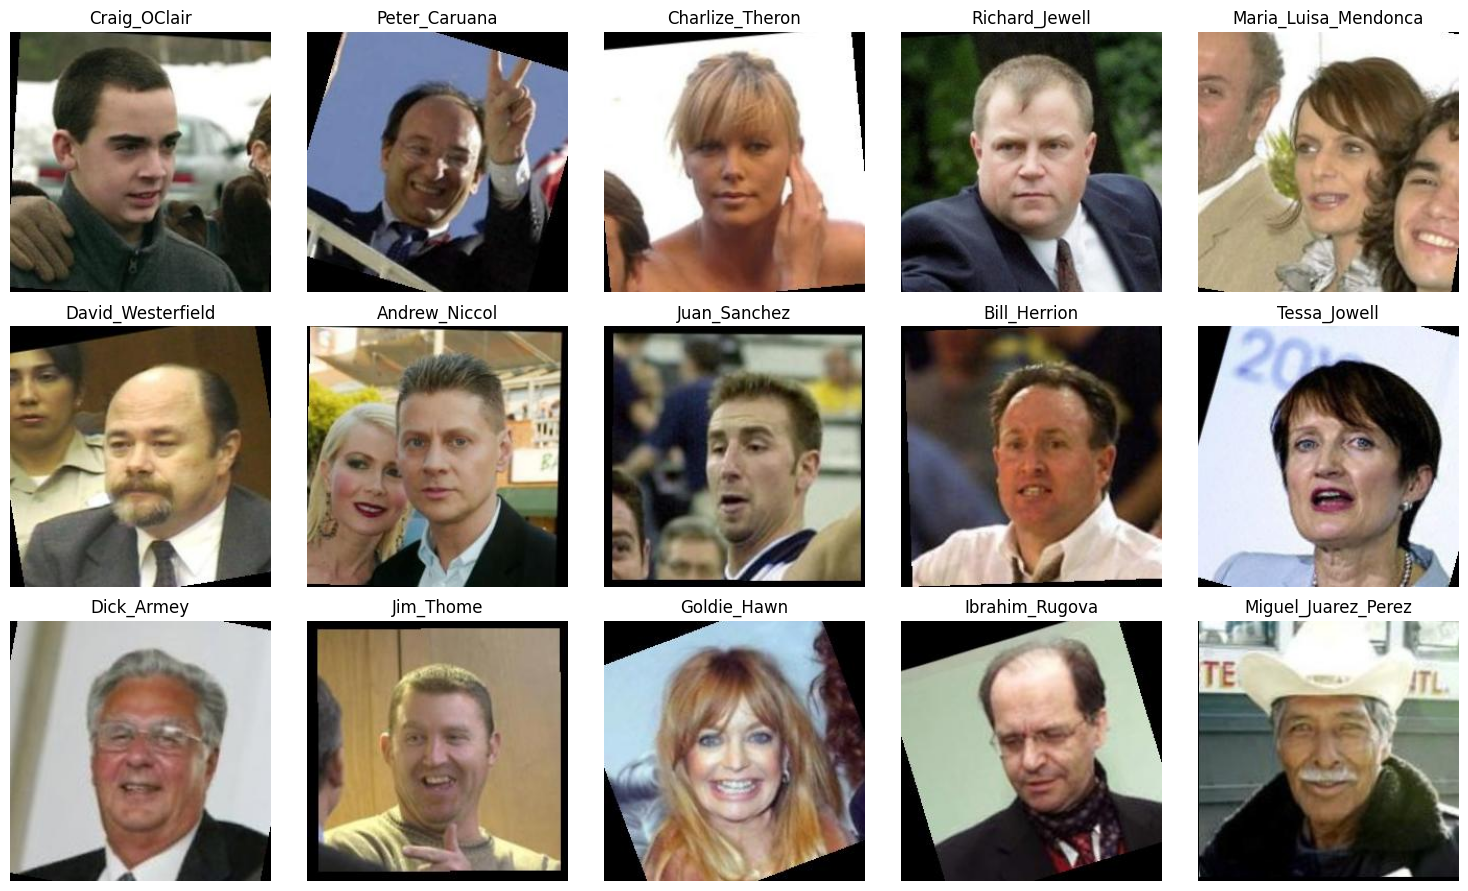

In [8]:
# Loading and displaying a grid of face images to show diversity
import numpy as np

# Selecting 15 random persons
random_persons_sample = np.random.choice(persons, 15, replace=False)

# For each selected person, we will pick one random image
selected_sample_images = []
for person in random_persons_sample:
    person_image_dir = os.path.join(images_dir, person)
    person_image_files = os.listdir(person_image_dir)
    selected_image_file = random.choice(person_image_files)
    selected_sample_images.append(os.path.join(person_image_dir, selected_image_file))

# Plotting the images in a grid
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for i, img_path in enumerate(selected_sample_images):
    img = mpimg.imread(img_path)
    axs[i // 5, i % 5].imshow(img)
    axs[i // 5, i % 5].set_title(img_path.split('/')[-2])
    axs[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

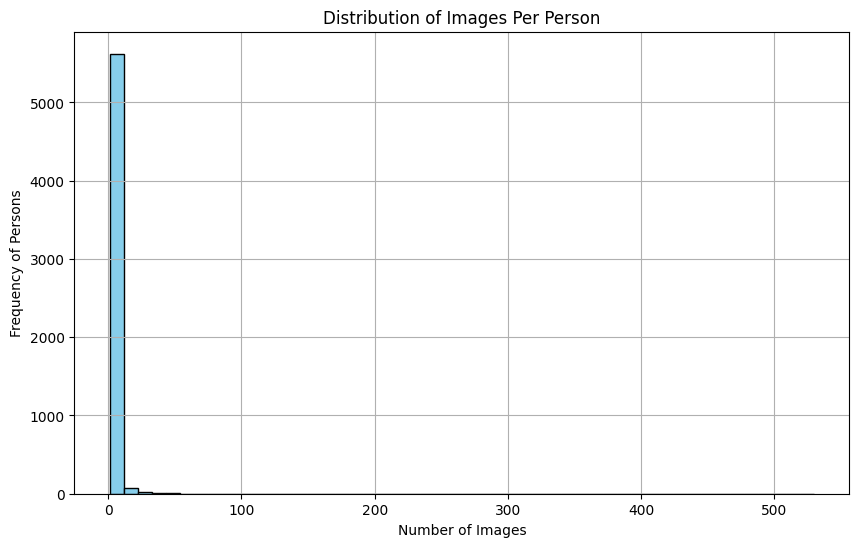

,images
count,5749.000000
mean,2.301792
std,9.016410
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,530.000000


In [9]:
import pandas as pd

# Load the CSV file containing all names and the number of images per person
names_csv_path = os.path.join(extract_to_path, 'lfw_allnames.csv')
names_df = pd.read_csv(names_csv_path)

# Plotting the distribution of images per person
plt.figure(figsize=(10, 6))
plt.hist(names_df['images'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Images Per Person')
plt.xlabel('Number of Images')
plt.ylabel('Frequency of Persons')
plt.grid(True)
plt.show()

# Basic statistics
names_df['images'].describe()

In [10]:
# Load other metadata files for analysis
pairs_path = os.path.join(extract_to_path, 'pairs.csv')
people_path = os.path.join(extract_to_path, 'people.csv')
peopleDevTest_path = os.path.join(extract_to_path, 'peopleDevTest.csv')
peopleDevTrain_path = os.path.join(extract_to_path, 'peopleDevTrain.csv')

# Load these CSV files into pandas dataframes
pairs_df = pd.read_csv(pairs_path)
people_df = pd.read_csv(people_path)
peopleDevTest_df = pd.read_csv(peopleDevTest_path)
peopleDevTrain_df = pd.read_csv(peopleDevTrain_path)

# Display basic summaries of these dataframes to understand the structure and content
metadata_summaries = {
    "Pairs.csv": pairs_df.head(),
    "People.csv": people_df.head(),
    "PeopleDevTest.csv": peopleDevTest_df.head(),
    "PeopleDevTrain.csv": peopleDevTrain_df.head()
}

metadata_summaries

{'Pairs.csv':                     name  imagenum1 imagenum2  Unnamed: 3
 0           Abel_Pacheco          1         4         NaN
 1         Akhmed_Zakayev          1         3         NaN
 2         Akhmed_Zakayev          2         3         NaN
 3          Amber_Tamblyn          1         2         NaN
 4  Anders_Fogh_Rasmussen          1         3         NaN,
 'People.csv':                  name  images
 0  Abdel_Madi_Shabneh     1.0
 1        Abdul_Rahman     1.0
 2        Abel_Pacheco     4.0
 3        Adriana_Lima     1.0
 4         Afton_Smith     1.0,
 'PeopleDevTest.csv':                      name  images
 0                AJ_Lamas       1
 1             Aaron_Guiel       1
 2            Aaron_Tippin       1
 3               Abba_Eban       1
 4  Abdul_Majeed_Shobokshi       1,
 'PeopleDevTrain.csv':               name  images
 0          AJ_Cook       1
 1    Aaron_Eckhart       1
 2  Aaron_Patterson       1
 3    Aaron_Peirsol       4
 4       Aaron_Pena       1}

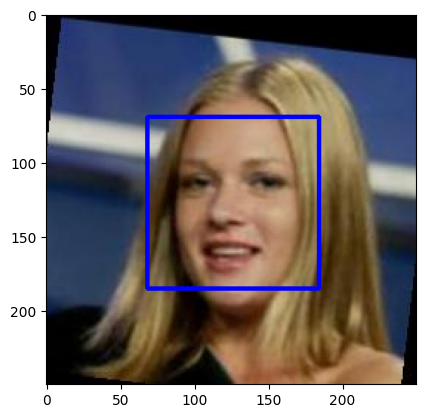

In [11]:
import cv2
from matplotlib import pyplot as plt

# Load an image
image = cv2.imread('/content/lfw/lfw-deepfunneled/lfw-deepfunneled/AJ_Cook/AJ_Cook_0001.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Convert to RGB and display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
import cv2
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
# Load the face detection model
face_detector_prototxt = '/content/opencvfacerecognizer/opencv-face-recognizer/face_detection_model/deploy.prototxt'
face_detector_model = '/content/opencvfacerecognizer/opencv-face-recognizer/face_detection_model/res10_300x300_ssd_iter_140000.caffemodel'
if not os.path.exists(face_detector_prototxt) or not os.path.exists(face_detector_model):
    print("Face detector model files not found!")
else:
    face_detector = cv2.dnn.readNetFromCaffe(face_detector_prototxt, face_detector_model)

# Load the model to extract face embeddings (here, using OpenFace as an example)
model_path = '/content/opencvfacerecognizer/opencv-face-recognizer/openface_nn4.small2.v1.t7'
if not os.path.exists(model_path):
    print("Face recognizer model file not found!")
else:
    face_recognizer = cv2.dnn.readNetFromTorch(model_path)

In [55]:
def detect_faces(image, detector):
    h, w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0), False, False)
    detector.setInput(blob)
    detections = detector.forward()
    faces = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:  # Confidence threshold
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype(int)
            # Ensure the bounding box is fully within the image dimensions
            startX, startY, endX, endY = max(0, startX), max(0, startY), min(w-1, endX), min(h-1, endY)
            if endX > startX and endY > startY:  # Ensure the box is non-empty
                faces.append((startX, startY, endX, endY))
    return faces

def extract_features(face_image, recognizer):
    if face_image.size == 0:
        return None
    print(f"Face image shape: {face_image.shape}")
    blob = cv2.dnn.blobFromImage(face_image, 1.0 / 255, (96, 96), (0, 0, 0), True, False)
    recognizer.setInput(blob)
    features = recognizer.forward()
    print(f"Extracted features (sample): {features.flatten()[:5]}")
    return features

In [56]:
image_folder = '/content/lfw/lfw-deepfunneled/lfw-deepfunneled'
embeddings = []
labels = []

for person_name in os.listdir(image_folder):
    person_folder = os.path.join(image_folder, person_name)
    if not os.path.isdir(person_folder):
        continue
    for image_name in os.listdir(person_folder):
        image_path = os.path.join(person_folder, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            faces = detect_faces(image, face_detector)
            for face in faces:
                x, y, x2, y2 = face
                face_img = image[y:y2, x:x2]
                embedding = extract_features(face_img, face_recognizer)
                if embedding is not None:
                    print(f"Processing {image_path}")
                    print(f"Embedding (sample): {embedding.flatten()[:5]}")
                    embeddings.append(embedding)
                    labels.append(person_name)

Streaming output truncated to the last 5000 lines.
Face image shape: (96, 36, 3)
Extracted features (sample): [ 0.1313335  -0.04048593 -0.04413573 -0.00628417  0.16203359]
Processing /content/lfw/lfw-deepfunneled/lfw-deepfunneled/Fidel_Castro/Fidel_Castro_0013.jpg
Embedding (sample): [ 0.1313335  -0.04048593 -0.04413573 -0.00628417  0.16203359]
Face image shape: (161, 110, 3)
Extracted features (sample): [0.02843871 0.09917288 0.07386247 0.05134714 0.06018721]
Processing /content/lfw/lfw-deepfunneled/lfw-deepfunneled/Fidel_Castro/Fidel_Castro_0016.jpg
Embedding (sample): [0.02843871 0.09917288 0.07386247 0.05134714 0.06018721]
Face image shape: (128, 115, 3)
Extracted features (sample): [ 0.07765608 -0.06688616 -0.06898197 -0.10328163  0.09387412]
Processing /content/lfw/lfw-deepfunneled/lfw-deepfunneled/Fidel_Castro/Fidel_Castro_0016.jpg
Embedding (sample): [ 0.07765608 -0.06688616 -0.06898197 -0.10328163  0.09387412]
Face image shape: (138, 92, 3)
Extracted features (sample): [0.0926

In [57]:
def recognize_face(input_embedding, embeddings, labels, threshold=0.5):
    max_similarity = 0
    recognized_label = "Unknown"
    for i, existing_embedding in enumerate(embeddings):
        similarity = cosine_similarity(input_embedding.reshape(1, -1), existing_embedding.reshape(1, -1))
        if similarity > max_similarity:
            max_similarity = similarity
            if max_similarity > threshold:
                recognized_label = labels[i]
    return recognized_label

In [58]:
# Import necessary libraries
import cv2
import numpy as np

# Path to the image you want to test
test_image_path = '/content/opencvfacerecognizer/opencv-face-recognizer/images/unknown2.jpg'

# Read the image
test_image = cv2.imread(test_image_path)
if test_image is None:
    print("Image not found or unable to read.")

# Perform face detection
faces = detect_faces(test_image, face_detector)
if not faces:
    print("No faces detected.")

# Loop through detected faces
for face in faces:
    x, y, x2, y2 = face
    # Extract the face region from the image
    face_img = test_image[y:y2, x:x2]

    # Ensure the face region is not empty
    if face_img.size != 0:
        # Extract features (embeddings) of the detected face
        input_embedding = extract_features(face_img, face_recognizer)

        if input_embedding is not None:
            # Recognize the face by comparing it against stored embeddings
            recognized_person = recognize_face(input_embedding, embeddings, labels)
            print(f"Recognized: {recognized_person}")
        else:
            print("Unable to extract features from the face.")
    else:
        print("Detected face region is invalid.")

Face image shape: (42, 35, 3)
Extracted features (sample): [ 0.06444881  0.03547241 -0.17940485  0.0144493  -0.00384859]
Recognized: Rupert_Grint
Face image shape: (46, 38, 3)
Extracted features (sample): [ 0.11282017 -0.00357731 -0.07172795  0.03135072  0.08642258]
Recognized: Oprah_Winfrey
Face image shape: (45, 39, 3)
Extracted features (sample): [ 0.1399921   0.05698059 -0.06156559 -0.03430283  0.04268504]
Recognized: Colin_Powell
Face image shape: (44, 33, 3)
Extracted features (sample): [ 0.06932786 -0.01084442 -0.03930647  0.03304434  0.0339276 ]
Recognized: Jennifer_Lopez


In [59]:
def recognize_face(input_embedding, embeddings, labels, threshold=0.5):
    max_similarity = 0
    recognized_label = "Unknown"
    for i, existing_embedding in enumerate(embeddings):
        # Assume embeddings are numpy arrays and calculate cosine similarity
        similarity = np.dot(input_embedding.flatten(), existing_embedding.flatten()) / (
            np.linalg.norm(input_embedding.flatten()) * np.linalg.norm(existing_embedding.flatten()))

        # Debugging print statements
        if i < 5: # Print for the first 5 comparisons
            print(f"Comparing with {labels[i]}, similarity: {similarity}")
            print(f"Input embedding (sample): {input_embedding.flatten()[:5]}")
            print(f"Existing embedding (sample): {existing_embedding.flatten()[:5]}")

        if similarity > max_similarity:
            max_similarity = similarity
            if max_similarity > threshold:
                recognized_label = labels[i]

    return recognized_label, max_similarity

Face image shape: (127, 95, 3)
Extracted features (sample): [-0.0488175   0.14649993  0.06375901  0.04091766  0.11373548]
Comparing with Carlos_Fasciolo, similarity: 0.2799489200115204
Input embedding (sample): [-0.0488175   0.14649993  0.06375901  0.04091766  0.11373548]
Existing embedding (sample): [ 0.0575438   0.17520335 -0.0402174  -0.12991291 -0.05202355]
Comparing with Jennifer_Rodriguez, similarity: 0.12378820776939392
Input embedding (sample): [-0.0488175   0.14649993  0.06375901  0.04091766  0.11373548]
Existing embedding (sample): [ 0.08058634 -0.04714435 -0.19782765  0.02524367  0.0895778 ]
Comparing with Jennifer_Rodriguez, similarity: 0.06626798212528229
Input embedding (sample): [-0.0488175   0.14649993  0.06375901  0.04091766  0.11373548]
Existing embedding (sample): [ 0.00219898 -0.02539382 -0.07369543 -0.06370791  0.00735564]
Comparing with Kamel_Morjane, similarity: 0.10281375050544739
Input embedding (sample): [-0.0488175   0.14649993  0.06375901  0.04091766  0.1137

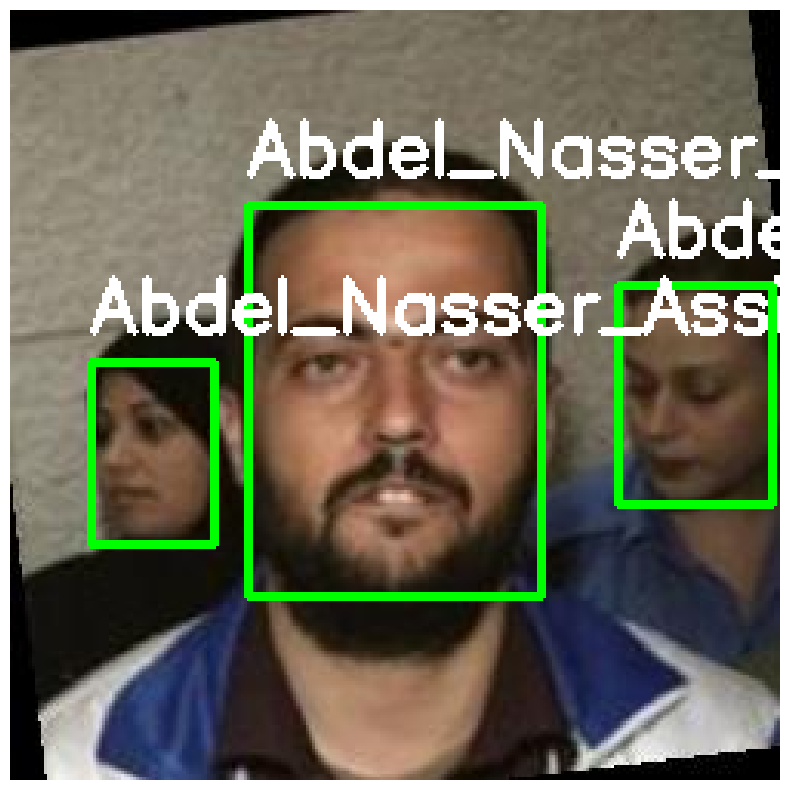

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
test_image_path = '/content/lfw/lfw-deepfunneled/lfw-deepfunneled/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg'
test_image = cv2.imread(test_image_path)

if test_image is None:
    print("Image not found or unable to read.")
else:
    # Perform face detection
    faces = detect_faces(test_image, face_detector)

    if not faces:
        print("No faces detected.")

    for face in faces:
        x, y, x2, y2 = face
        face_img = test_image[y:y2, x:x2]

        if face_img.size != 0:
            input_embedding = extract_features(face_img, face_recognizer)

            if input_embedding is not None:
                recognized_person, similarity = recognize_face(input_embedding, embeddings, labels)

                # Drawing the face bounding box
                cv2.rectangle(test_image, (x, y), (x2, y2), (0, 255, 0), 2)

                # Adding the recognition label and similarity score
                label = f"{recognized_person}, Sim: {similarity:.2f}"
                cv2.putText(test_image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

                print(f"Recognized: {recognized_person}, Similarity: {similarity}")

            else:
                print("Unable to extract features from the face.")
        else:
            print("Detected face region is invalid.")

    # Convert from BGR to RGB for display
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))  # You can adjust the display size
    plt.imshow(test_image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()

In [62]:
def detect_faces(image, detector):
    h, w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0), False, False)
    detector.setInput(blob)
    detections = detector.forward()
    faces = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:  # Adjust this threshold as needed
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            startX, startY, endX, endY = box.astype(int)
            faces.append((startX, startY, endX, endY, confidence))
    return faces

Face image shape: (119, 95, 3)
Extracted features (sample): [-0.07974631  0.04105068 -0.01648301 -0.04615551  0.01164604]
Comparing with Carlos_Fasciolo, similarity: 0.1401604562997818
Input embedding (sample): [-0.07974631  0.04105068 -0.01648301 -0.04615551  0.01164604]
Existing embedding (sample): [ 0.0575438   0.17520335 -0.0402174  -0.12991291 -0.05202355]
Comparing with Jennifer_Rodriguez, similarity: 0.31739097833633423
Input embedding (sample): [-0.07974631  0.04105068 -0.01648301 -0.04615551  0.01164604]
Existing embedding (sample): [ 0.08058634 -0.04714435 -0.19782765  0.02524367  0.0895778 ]
Comparing with Jennifer_Rodriguez, similarity: 0.6187155246734619
Input embedding (sample): [-0.07974631  0.04105068 -0.01648301 -0.04615551  0.01164604]
Existing embedding (sample): [ 0.00219898 -0.02539382 -0.07369543 -0.06370791  0.00735564]
Comparing with Kamel_Morjane, similarity: 0.08218207955360413
Input embedding (sample): [-0.07974631  0.04105068 -0.01648301 -0.04615551  0.01164

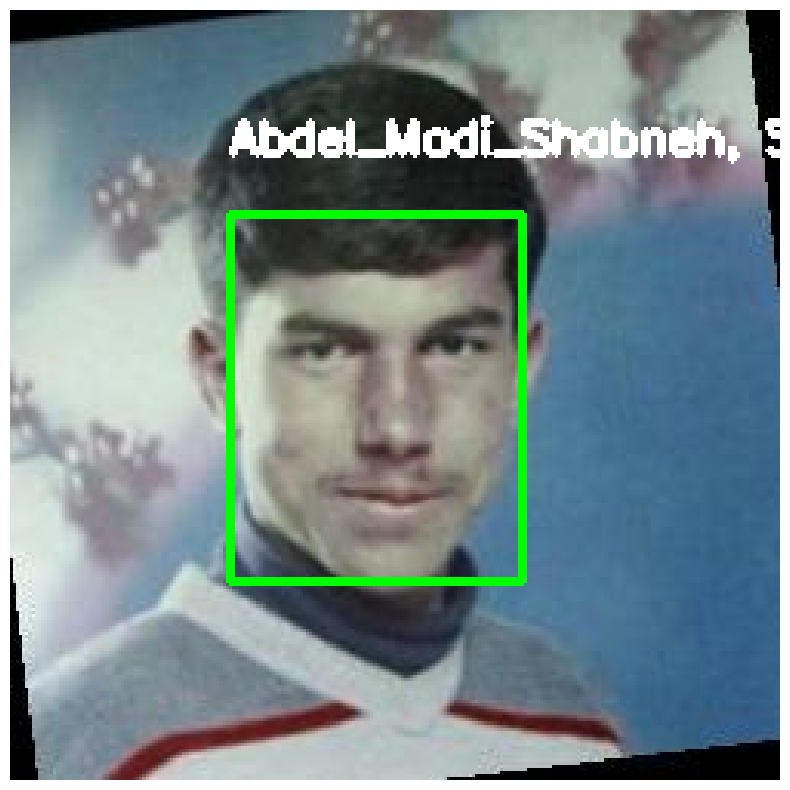

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
test_image_path = '/content/lfw/lfw-deepfunneled/lfw-deepfunneled/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg'
test_image = cv2.imread(test_image_path)

if test_image is None:
    print("Image not found or unable to read.")
else:
    # Perform face detection
    faces = detect_faces(test_image, face_detector)

    if not faces:
        print("No faces detected.")

    for (x, y, x2, y2, conf) in faces:
        face_img = test_image[y:y2, x:x2]

        if face_img.size != 0:
            input_embedding = extract_features(face_img, face_recognizer)

            if input_embedding is not None:
                recognized_person, similarity = recognize_face(input_embedding, embeddings, labels)

                # Drawing the face bounding box
                cv2.rectangle(test_image, (x, y), (x2, y2), (0, 255, 0), 2)

                # Adding the recognition label, similarity score, and detection confidence
                label = f"{recognized_person}, Sim: {similarity:.2f}, Conf: {conf:.2f}"
                cv2.putText(test_image, label, (x, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

            else:
                print("Unable to extract features from the face.")
        else:
            print("Detected face region is invalid.")

    # Convert from BGR to RGB for display
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))  # You can adjust the display size
    plt.imshow(test_image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()